# breast cancer detection

##### par asmae karmouchi

In [79]:

# Importer les bibliothèques nécessaires
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import accuracy_score, mean_squared_error

## I pretraitement

In [80]:

# Charger l'ensemble de données
data = pd.read_csv('breast-cancer.csv')  # Assurez-vous de remplacer 'nom_du_fichier.csv' par le nom de votre fichier CSV

# Afficher les premières lignes de l'ensemble de données
data.head()


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [81]:
# Afficher la taille (nombre de lignes et de colonnes) du DataFrame
print("Taille de l'ensemble de données (lignes, colonnes) :", data.shape)

# Afficher les noms des colonnes
print("Noms des colonnes :", data.columns)


Taille de l'ensemble de données (lignes, colonnes) : (569, 33)
Noms des colonnes : Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')


In [82]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [83]:
data.drop(columns={'Unnamed: 32'},inplace=True)

In [84]:
train_datas_id = data['id']
data.drop(columns={'id'},inplace=True)

In [85]:
# Afficher les valeurs uniques de la colonne 'diagnosis'
unique_diagnosis = data['diagnosis'].unique()
print("Valeurs uniques de la colonne 'diagnosis' :", unique_diagnosis)


Valeurs uniques de la colonne 'diagnosis' : ['M' 'B']


In [86]:
#Conversion des données de diagnostic en version numérique
diagnosis={'M':1, 'B':0}
data['diagnosis']=[diagnosis[x] for x in data['diagnosis']]

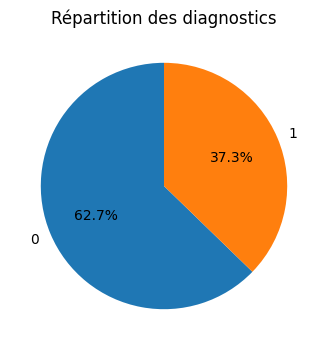

In [87]:
import matplotlib.pyplot as plt

# Compter les occurrences de chaque valeur dans la colonne 'diagnosis'
diagnosis_counts = data['diagnosis'].value_counts()

# Obtenir les étiquettes (Malignant et Benign) et les valeurs correspondantes
labels = diagnosis_counts.index
sizes = diagnosis_counts.values

# Créer un diagramme circulaire
plt.figure(figsize=(4, 4))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title("Répartition des diagnostics")

# Afficher le diagramme
plt.show()


Après la vérification, il y a une différence entre les deux classes mais il y a une probabilité qu'elle soit encore utile pour créer de bons modèles d'ai sans aucun changement, parce que la différence n'est pas trop grande.

In [88]:
# Diviser les données en fonctionnalités (X) et en étiquettes (y)
X = data.drop('diagnosis', axis=1)
y = data['diagnosis']


In [89]:
# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [90]:
# Normaliser les fonctionnalités (échelle)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

KNN

In [91]:
# Appliquer l'algorithme k-NN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
knn_predictions = knn.predict(X_test)
knn_accuracy = accuracy_score(y_test, knn_predictions)
print(f'l Accuracy  de k-NN : {knn_accuracy}')

l Accuracy  de k-NN : 0.9473684210526315


naive_bayes

In [92]:
from sklearn.naive_bayes import GaussianNB

# Appliquer l'algorithme Naïve Bayes
naive_bayes = GaussianNB()
naive_bayes.fit(X_train, y_train)
naive_bayes_predictions = naive_bayes.predict(X_test)
naive_bayes_accuracy = accuracy_score(y_test, naive_bayes_predictions)
print(f'l Accuracy de Naïve Bayes : {naive_bayes_accuracy}')


l Accuracy de Naïve Bayes : 0.9649122807017544


SVM

In [93]:
# Appliquer l'algorithme SVM
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train, y_train)
svm_predictions = svm.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_predictions)
print(f'l Accuracy de SVM : {svm_accuracy}')

l Accuracy de SVM : 0.9824561403508771


RL MABLANCH

In [94]:
from sklearn.metrics import r2_score
# Appliquer la régression linéaire
#linear_reg = LinearRegression()
#linear_reg.fit(X_train, y_train)
##linear_reg_predictions = linear_reg.predict(X_test)
#linear_reg_mse = mean_squared_error(y_test, linear_reg_predictions)
#print(f'Erreur quadratique moyenne de la régression linéaire : {linear_reg_mse}')
#linear_reg_r2 = r2_score(y_test, linear_reg_predictions)
#print(f"R² de la régression linéaire : {linear_reg_r2}")
#linear_reg_accuracy = linear_reg_r2

R LOG

In [95]:
# Appliquer la régression logistique
logistic_reg = LogisticRegression()
logistic_reg.fit(X_train, y_train)
logistic_reg_predictions = logistic_reg.predict(X_test)
logistic_reg_accuracy = accuracy_score(y_test, logistic_reg_predictions)
print(f'l Accuracy  de la régression logistique : {logistic_reg_accuracy}')

l Accuracy  de la régression logistique : 0.9736842105263158


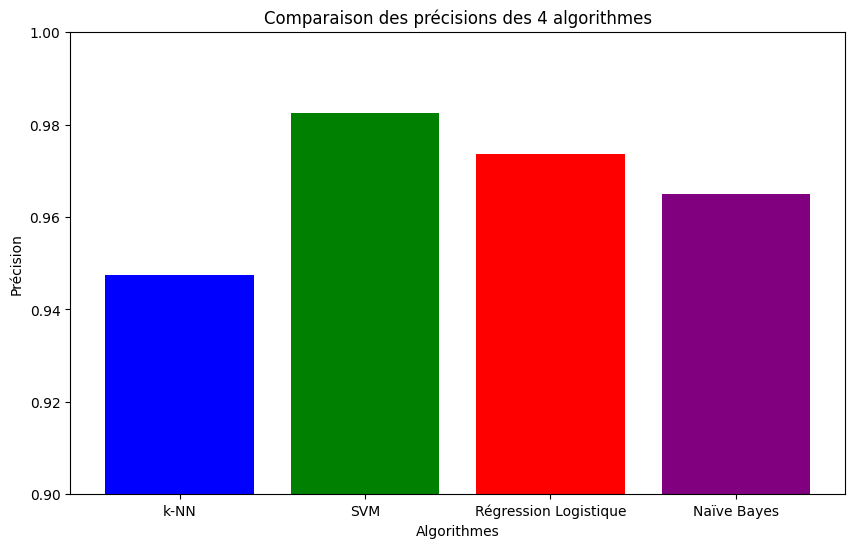

In [96]:
import matplotlib.pyplot as plt

# Précisions des 4 algorithmes
accuracies = [knn_accuracy, svm_accuracy,  logistic_reg_accuracy , naive_bayes_accuracy] 
algorithms = ['k-NN', 'SVM', 'Régression Logistique' , 'Naïve Bayes']

# Créer un graphique à barres pour comparer les précisions
plt.figure(figsize=(10, 6))
plt.bar(algorithms, accuracies, color=['blue', 'green', 'red', 'purple' ])
plt.xlabel('Algorithmes')
plt.ylabel('Précision')
plt.title('Comparaison des précisions des 4 algorithmes')
plt.ylim(0.9, 1.0)  # Ajuster la plage de l'axe y si nécessaire
plt.show()


In [97]:
import joblib

# Après avoir entraîné le modèle SVM
svm = SVC()
svm.fit(X_train, y_train)

# Sauvegarder le modèle dans un fichier
joblib.dump(svm, 'svm_model.pkl')
joblib.dump(scaler, 'scaler.pkl')


['scaler.pkl']


Matrice de confusion pour k-NN:
[[68  3]
 [ 3 40]]


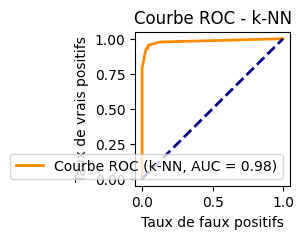


Matrice de confusion pour SVM:
[[71  0]
 [ 2 41]]


AttributeError: predict_proba is not available when  probability=False

In [98]:
from sklearn.metrics import confusion_matrix, roc_curve, auc

# ...

# Mesurer et afficher la matrice de confusion pour chaque algorithme
algorithms = [knn, svm,  logistic_reg, naive_bayes]
algorithm_names = ['k-NN', 'SVM',  'Régression Logistique', 'Naïve Bayes']

for algo, name in zip(algorithms, algorithm_names):
    predictions = algo.predict(X_test)
    cm = confusion_matrix(y_test, predictions)
    print(f"\nMatrice de confusion pour {name}:\n{cm}")

    # Afficher la courbe ROC et calculer l'AUC
    fpr, tpr, thresholds = roc_curve(y_test, algo.predict_proba(X_test)[:, 1])
    roc_auc = auc(fpr, tpr)

    # Tracer la courbe ROC
    plt.figure(figsize=(2, 2))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Courbe ROC ({name}, AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('Taux de faux positifs')
    plt.ylabel('Taux de vrais positifs')
    plt.title(f'Courbe ROC - {name}')
    plt.legend(loc="lower right")
    plt.show()
